In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
#1
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)
print(df)


  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


In [82]:
#2
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


In [83]:
#3
df.head(3)


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [84]:
#4
df[['animal', 'age']]


,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


In [85]:
#5
df.loc[['d', 'e', 'i'], ['animal', 'age']]


,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


In [86]:
#6
df[df['visits'] > 3]


,animal,age,visits,priority


In [87]:
#7
df[df['age'].isnull()]


,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


In [88]:
#8
df[(df['animal'] == 'cat') & (df['age'] < 3)]


,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


In [89]:
#9
df[df['age'].between(2, 4, inclusive='both')]


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


In [90]:
#10
df.at['f', 'age'] = 1.5
df[['age']]

,age
a,2.5
b,3.0
c,0.5
d,NaN
e,5.0
f,1.5
g,4.5
h,NaN
i,7.0
j,3.0


In [91]:
#11
tot_visits = df['visits'].sum()
print(tot_visits)


19


In [92]:
#12
mean_age_by_animal = df.groupby('animal')['age'].mean()
print(mean_age_by_animal)


animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64


In [93]:
#13
df.loc['k'] = ['rabbit', 2, 1, 'yes']
print(df)
print()
df = df.drop('k')
print(df)

   animal  age  visits priority
a     cat  2.5       1      yes
b     cat  3.0       3      yes
c   snake  0.5       2       no
d     dog  NaN       3      yes
e     dog  5.0       2       no
f     cat  1.5       3       no
g   snake  4.5       1       no
h     cat  NaN       1      yes
i     dog  7.0       2       no
j     dog  3.0       1       no
k  rabbit  2.0       1      yes

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


In [94]:
#14
animal_counts = df['animal'].value_counts()
print(animal_counts)


cat      4
dog      4
snake    2
Name: animal, dtype: int64


In [101]:
#15
df = df.sort_values(['age', 'visits'], ascending=[False,True])
print(df)


   animal  age  visits  priority
i     dog  7.0       2     False
e     dog  5.0       2     False
g  python  4.5       1     False
j     dog  3.0       1     False
b     cat  3.0       3      True
a     cat  2.5       1      True
f     cat  1.5       3     False
c  python  0.5       2     False
h     cat  NaN       1      True
d     dog  NaN       3      True


In [96]:
#16
df['priority'] = df['priority'].replace({'yes': True, 'no': False})
print(df)

  animal  age  visits  priority
i    dog  7.0       2     False
e    dog  5.0       2     False
g  snake  4.5       1     False
j    dog  3.0       1     False
b    cat  3.0       3      True
a    cat  2.5       1      True
f    cat  1.5       3     False
c  snake  0.5       2     False
h    cat  NaN       1      True
d    dog  NaN       3      True


In [97]:
#17
df['animal'] = df['animal'].replace('snake', 'python')
print(df)

   animal  age  visits  priority
i     dog  7.0       2     False
e     dog  5.0       2     False
g  python  4.5       1     False
j     dog  3.0       1     False
b     cat  3.0       3      True
a     cat  2.5       1      True
f     cat  1.5       3     False
c  python  0.5       2     False
h     cat  NaN       1      True
d     dog  NaN       3      True


In [98]:
#18
path = 'ny-flights.csv'
flights_df = pd.read_csv(path)
flights_df.head()

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00


In [99]:
#19
max_airline_id = flights_df['airline_id'].value_counts().idxmax()
print("Airline ID present maximum times:", max_airline_id)


Airline ID present maximum times: 20409


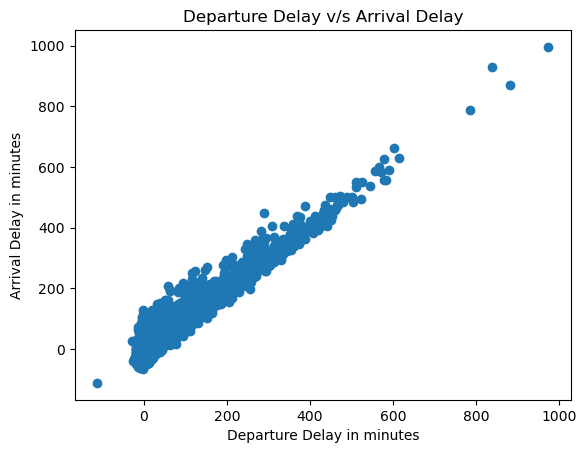

In [100]:
#20
plt.scatter(flights_df['dep_delay'], flights_df['arr_delay'])
plt.title('Departure Delay v/s Arrival Delay')
plt.xlabel('Departure Delay in minutes')
plt.ylabel('Arrival Delay in minutes')
plt.show()